In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/My Drive/ML_PROJECT

/content/drive/.shortcut-targets-by-id/1-ZTw4MSWOQcdu6QvytRZyQb-Ws3UAU7A/ML_PROJECT


In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import  image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
import matplotlib.pyplot as plt
from imutils import paths
import random
import os
import shutil

In [4]:
import sys 
sys.path.append("/content/drive/MyDrive/ML_PROJECT")
from generate_data import get_data_generator

In [6]:
training_data,validation_data,testing_data=get_data_generator()

Found 5520 images belonging to 2 classes.
Found 2207 images belonging to 2 classes.
Found 20667 images belonging to 2 classes.


In [7]:
from tensorflow.keras.layers import Input,Dropout,Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import  image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import matplotlib.pyplot as plt

In [ ]:
image_size = [224, 224]

vgg19 = VGG19(input_shape = image_size + [3], weights = 'imagenet', include_top = False)

In [ ]:
trainable = False
for layer in vgg19.layers:
    if layer.name == 'block5_conv4':
        trainable = True
    layer.trainable = trainable


In [ ]:
for layer in vgg19.layers:
    print('%s -> trainable? %s' % (layer.name, "Yes" if layer.trainable else "No"))

input_2 -> trainable? No
block1_conv1 -> trainable? No
block1_conv2 -> trainable? No
block1_pool -> trainable? No
block2_conv1 -> trainable? No
block2_conv2 -> trainable? No
block2_pool -> trainable? No
block3_conv1 -> trainable? No
block3_conv2 -> trainable? No
block3_conv3 -> trainable? No
block3_conv4 -> trainable? No
block3_pool -> trainable? No
block4_conv1 -> trainable? No
block4_conv2 -> trainable? No
block4_conv3 -> trainable? No
block4_conv4 -> trainable? No
block4_pool -> trainable? No
block5_conv1 -> trainable? No
block5_conv2 -> trainable? No
block5_conv3 -> trainable? No
block5_conv4 -> trainable? Yes
block5_pool -> trainable? Yes


In [ ]:
x = Flatten()(vgg19.output)

In [ ]:
predictions = Dense(2, activation = 'softmax')(x)
model = Sequential([
        vgg19,
        Flatten(),
        Dropout(0.20),         
        Dense(2, activation='softmax')    
    ])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_6 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 50178     
Total params: 20,074,562
Trainable params: 2,409,986
Non-trainable params: 17,664,576
_________________________________________________________________


In [ ]:
# optimizer adam
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from keras.callbacks import CSVLogger
len(training_data)

603

In [ ]:
csv_logger = CSVLogger('training.log', separator=',', append=False)
History = model.fit( 
    training_data, 
    validation_data = validation_data, 
    epochs = 30, 
    steps_per_epoch = len(training_data),
    validation_steps = len(validation_data),
    callbacks=[csv_logger]
    )
model.save('saved_model.h5')

Epoch 1/30
603/603 [==============================] - 236s 391ms/step - loss: 0.2581 - accuracy: 0.9044 - val_loss: 0.2068 - val_accuracy: 0.9310
Epoch 2/30
603/603 [==============================] - 235s 390ms/step - loss: 0.1997 - accuracy: 0.9298 - val_loss: 0.1950 - val_accuracy: 0.9245
Epoch 3/30
603/603 [==============================] - 237s 393ms/step - loss: 0.1858 - accuracy: 0.9342 - val_loss: 0.2337 - val_accuracy: 0.9209
Epoch 4/30
603/603 [==============================] - 236s 391ms/step - loss: 0.1829 - accuracy: 0.9346 - val_loss: 0.1770 - val_accuracy: 0.9310
Epoch 5/30
603/603 [==============================] - 235s 390ms/step - loss: 0.1760 - accuracy: 0.9371 - val_loss: 0.1732 - val_accuracy: 0.9368
Epoch 6/30
603/603 [==============================] - 236s 391ms/step - loss: 0.1731 - accuracy: 0.9393 - val_loss: 0.1670 - val_accuracy: 0.9383
Epoch 7/30
603/603 [==============================] - 238s 394ms/step - loss: 0.1672 - accuracy: 0.9405 - val_loss: 0.1733 -

In [ ]:
# Evaluating Model:
# import pandas as pd
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import keras

In [ ]:
testing_data.reset()
predictions = model.predict(testing_data, steps = len(testing_data))
# index of the label with largest predicted probability of each testing image
predictions = np.argmax(predictions, axis=1)

In [ ]:
print( classification_report(testing_data.classes, predictions, target_names= testing_data.class_indices.keys()))

              precision    recall  f1-score   support

 Parasitized       0.97      0.91      0.94      2727
  Uninfected       0.92      0.98      0.95      2786

    accuracy                           0.95      5513
   macro avg       0.95      0.95      0.95      5513
weighted avg       0.95      0.95      0.95      5513



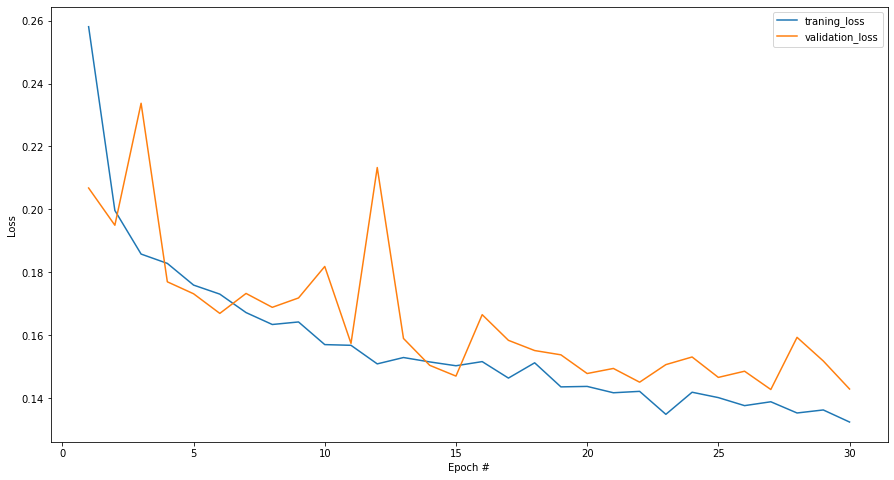

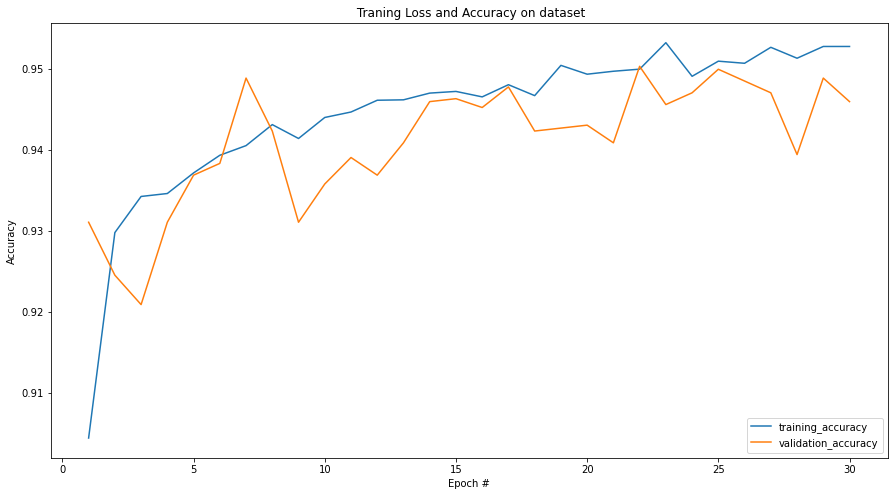

In [ ]:
# ploting training loss and accuracy
import numpy
N = 30 #number of epochs
num = []
for i in range(1, 31):
    num.append(i)
plt.figure(figsize=(15, 8))
plt.plot(num, History.history["loss"], label ="traning_loss")
plt.plot(num, History.history['val_loss'], label = 'validation_loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend(loc ='upper right')
plt.show()
plt.figure(figsize=(15, 8))
plt.plot(num, History.history['accuracy'], label='training_accuracy')
plt.plot(num, History.history['val_accuracy'], label = 'validation_accuracy')
plt.title(' Traning Loss and Accuracy on dataset')
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.legend(loc ='lower right')
plt.show()